<a href="https://colab.research.google.com/github/alaajomah/ML/blob/main/ARRTIFICAL_INTELLIGENT_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

الاء جمعة الزيادات/
ايمان ذياب حسين /
ايات بسام الحيصه

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix, classification_report

In [41]:
data= pd.read_csv('/content/cell2celltrain.csv')
df = pd.DataFrame(data)
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [43]:
df['HandsetPrice'] = df['HandsetPrice'].replace('Unknown', np.nan)
df['MaritalStatus'] = df['MaritalStatus'].replace('Unknown', np.nan)

In [44]:
df.isna().sum()

CustomerID                       0
Churn                            0
MonthlyRevenue                 156
MonthlyMinutes                 156
TotalRecurringCharge           156
DirectorAssistedCalls          156
OverageMinutes                 156
RoamingCalls                   156
PercChangeMinutes              367
PercChangeRevenues             367
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
ServiceArea                     24
Handsets                         1
HandsetModels       

In [45]:
print(df.value_counts() )

CustomerID  Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  PercChangeRevenues  DroppedCalls  BlockedCalls  UnansweredCalls  CustomerCareCalls  ThreewayCalls  ReceivedCalls  OutboundCalls  InboundCalls  PeakCallsInOut  OffPeakCallsInOut  DroppedBlockedCalls  CallForwardingCalls  CallWaitingCalls  MonthsInService  UniqueSubs  ActiveSubs  ServiceArea  Handsets  HandsetModels  CurrentEquipmentDays  AgeHH1  AgeHH2  ChildrenInHH  HandsetRefurbished  HandsetWebCapable  TruckOwner  RVOwner  Homeownership  BuysViaMailOrder  RespondsToMailOffers  OptOutMailings  NonUSTravel  OwnsComputer  HasCreditCard  RetentionCalls  RetentionOffersAccepted  NewCellphoneUser  NotNewCellphoneUser  ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  CreditRating  PrizmCode  Occupation    MaritalStatus
3000002     Yes    24.00           219.0           22.0   

**Preprocessing**

In [46]:
#Handling the missing data

df['ServiceArea'] = df['ServiceArea'].fillna(df['ServiceArea'].mode()[0]) # mode for handling object data
df['MaritalStatus'] = df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0]) # mode for handling object data
df[['HandsetPrice','MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'AgeHH1', 'AgeHH2', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays']] = df[['HandsetPrice','MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'AgeHH1', 'AgeHH2', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays']].fillna(df[['HandsetPrice','MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'AgeHH1', 'AgeHH2', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays']].median())

#Mode is used for categorical or discrete data
#median is commonly used for numerical data.

In [47]:
df.isna().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

In [48]:
#Show duplicated rows
df.duplicated().sum()

0

In [49]:
#one hot encoding
df = pd.get_dummies(df, columns=['PrizmCode','Occupation'])
# not have a specific order
#one-Hot Encoding can lead to a significant increase in the dimensionality

In [50]:
#lable encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for columns in ['Churn','ChildrenInHH','ServiceArea','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','MadeCallToRetentionTeam','CreditRating','MaritalStatus']:
    df[columns] = label_encoder.fit_transform(df[columns])





In [24]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  int64  
 2   MonthlyRevenue             51047 non-null  float64
 3   MonthlyMinutes             51047 non-null  float64
 4   TotalRecurringCharge       51047 non-null  float64
 5   DirectorAssistedCalls      51047 non-null  float64
 6   OverageMinutes             51047 non-null  float64
 7   RoamingCalls               51047 non-null  float64
 8   PercChangeMinutes          51047 non-null  float64
 9   PercChangeRevenues         51047 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [25]:
df.shape

(51047, 68)

In [51]:
#Normalization _MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns_to_normalize = ['ServiceArea','MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes','RoamingCalls','DroppedCalls','BlockedCalls','UnansweredCalls','CustomerCareCalls','ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','DroppedBlockedCalls','CallForwardingCalls','CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','HandsetModels','CurrentEquipmentDays','AgeHH1','AgeHH2','RetentionCalls','RetentionOffersAccepted','ReferralsMadeBySubscriber','IncomeGroup','AdjustmentsToCreditRating']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [52]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_normalize = ['PercChangeMinutes','PercChangeRevenues']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [53]:
print(df.value_counts())

CustomerID  Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  PercChangeRevenues  DroppedCalls  BlockedCalls  UnansweredCalls  CustomerCareCalls  ThreewayCalls  ReceivedCalls  OutboundCalls  InboundCalls  PeakCallsInOut  OffPeakCallsInOut  DroppedBlockedCalls  CallForwardingCalls  CallWaitingCalls  MonthsInService  UniqueSubs  ActiveSubs  ServiceArea  Handsets  HandsetModels  CurrentEquipmentDays  AgeHH1    AgeHH2    ChildrenInHH  HandsetRefurbished  HandsetWebCapable  TruckOwner  RVOwner  Homeownership  BuysViaMailOrder  RespondsToMailOffers  OptOutMailings  NonUSTravel  OwnsComputer  HasCreditCard  RetentionCalls  RetentionOffersAccepted  NewCellphoneUser  NotNewCellphoneUser  ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  CreditRating  MaritalStatus  PrizmCode_Other  PrizmCode_Rural  PrizmCode_Suburban  PrizmCode_Town  Occupati

In [54]:
df['Churn'].value_counts()

Churn
0    36336
1    14711
Name: count, dtype: int64

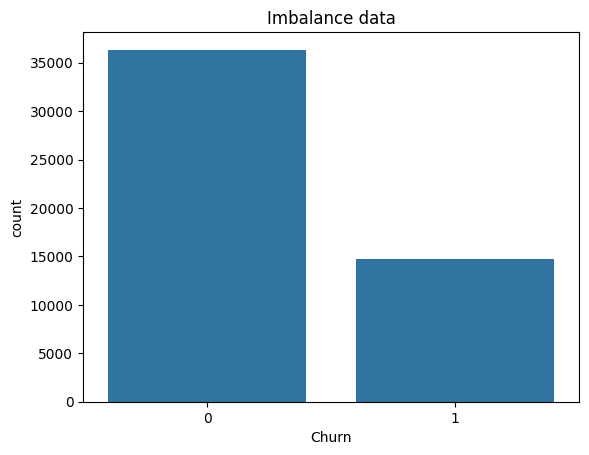

In [55]:
import seaborn as sns

sns.countplot(x='Churn', data=df)
plt.title("Imbalance data")
plt.show()

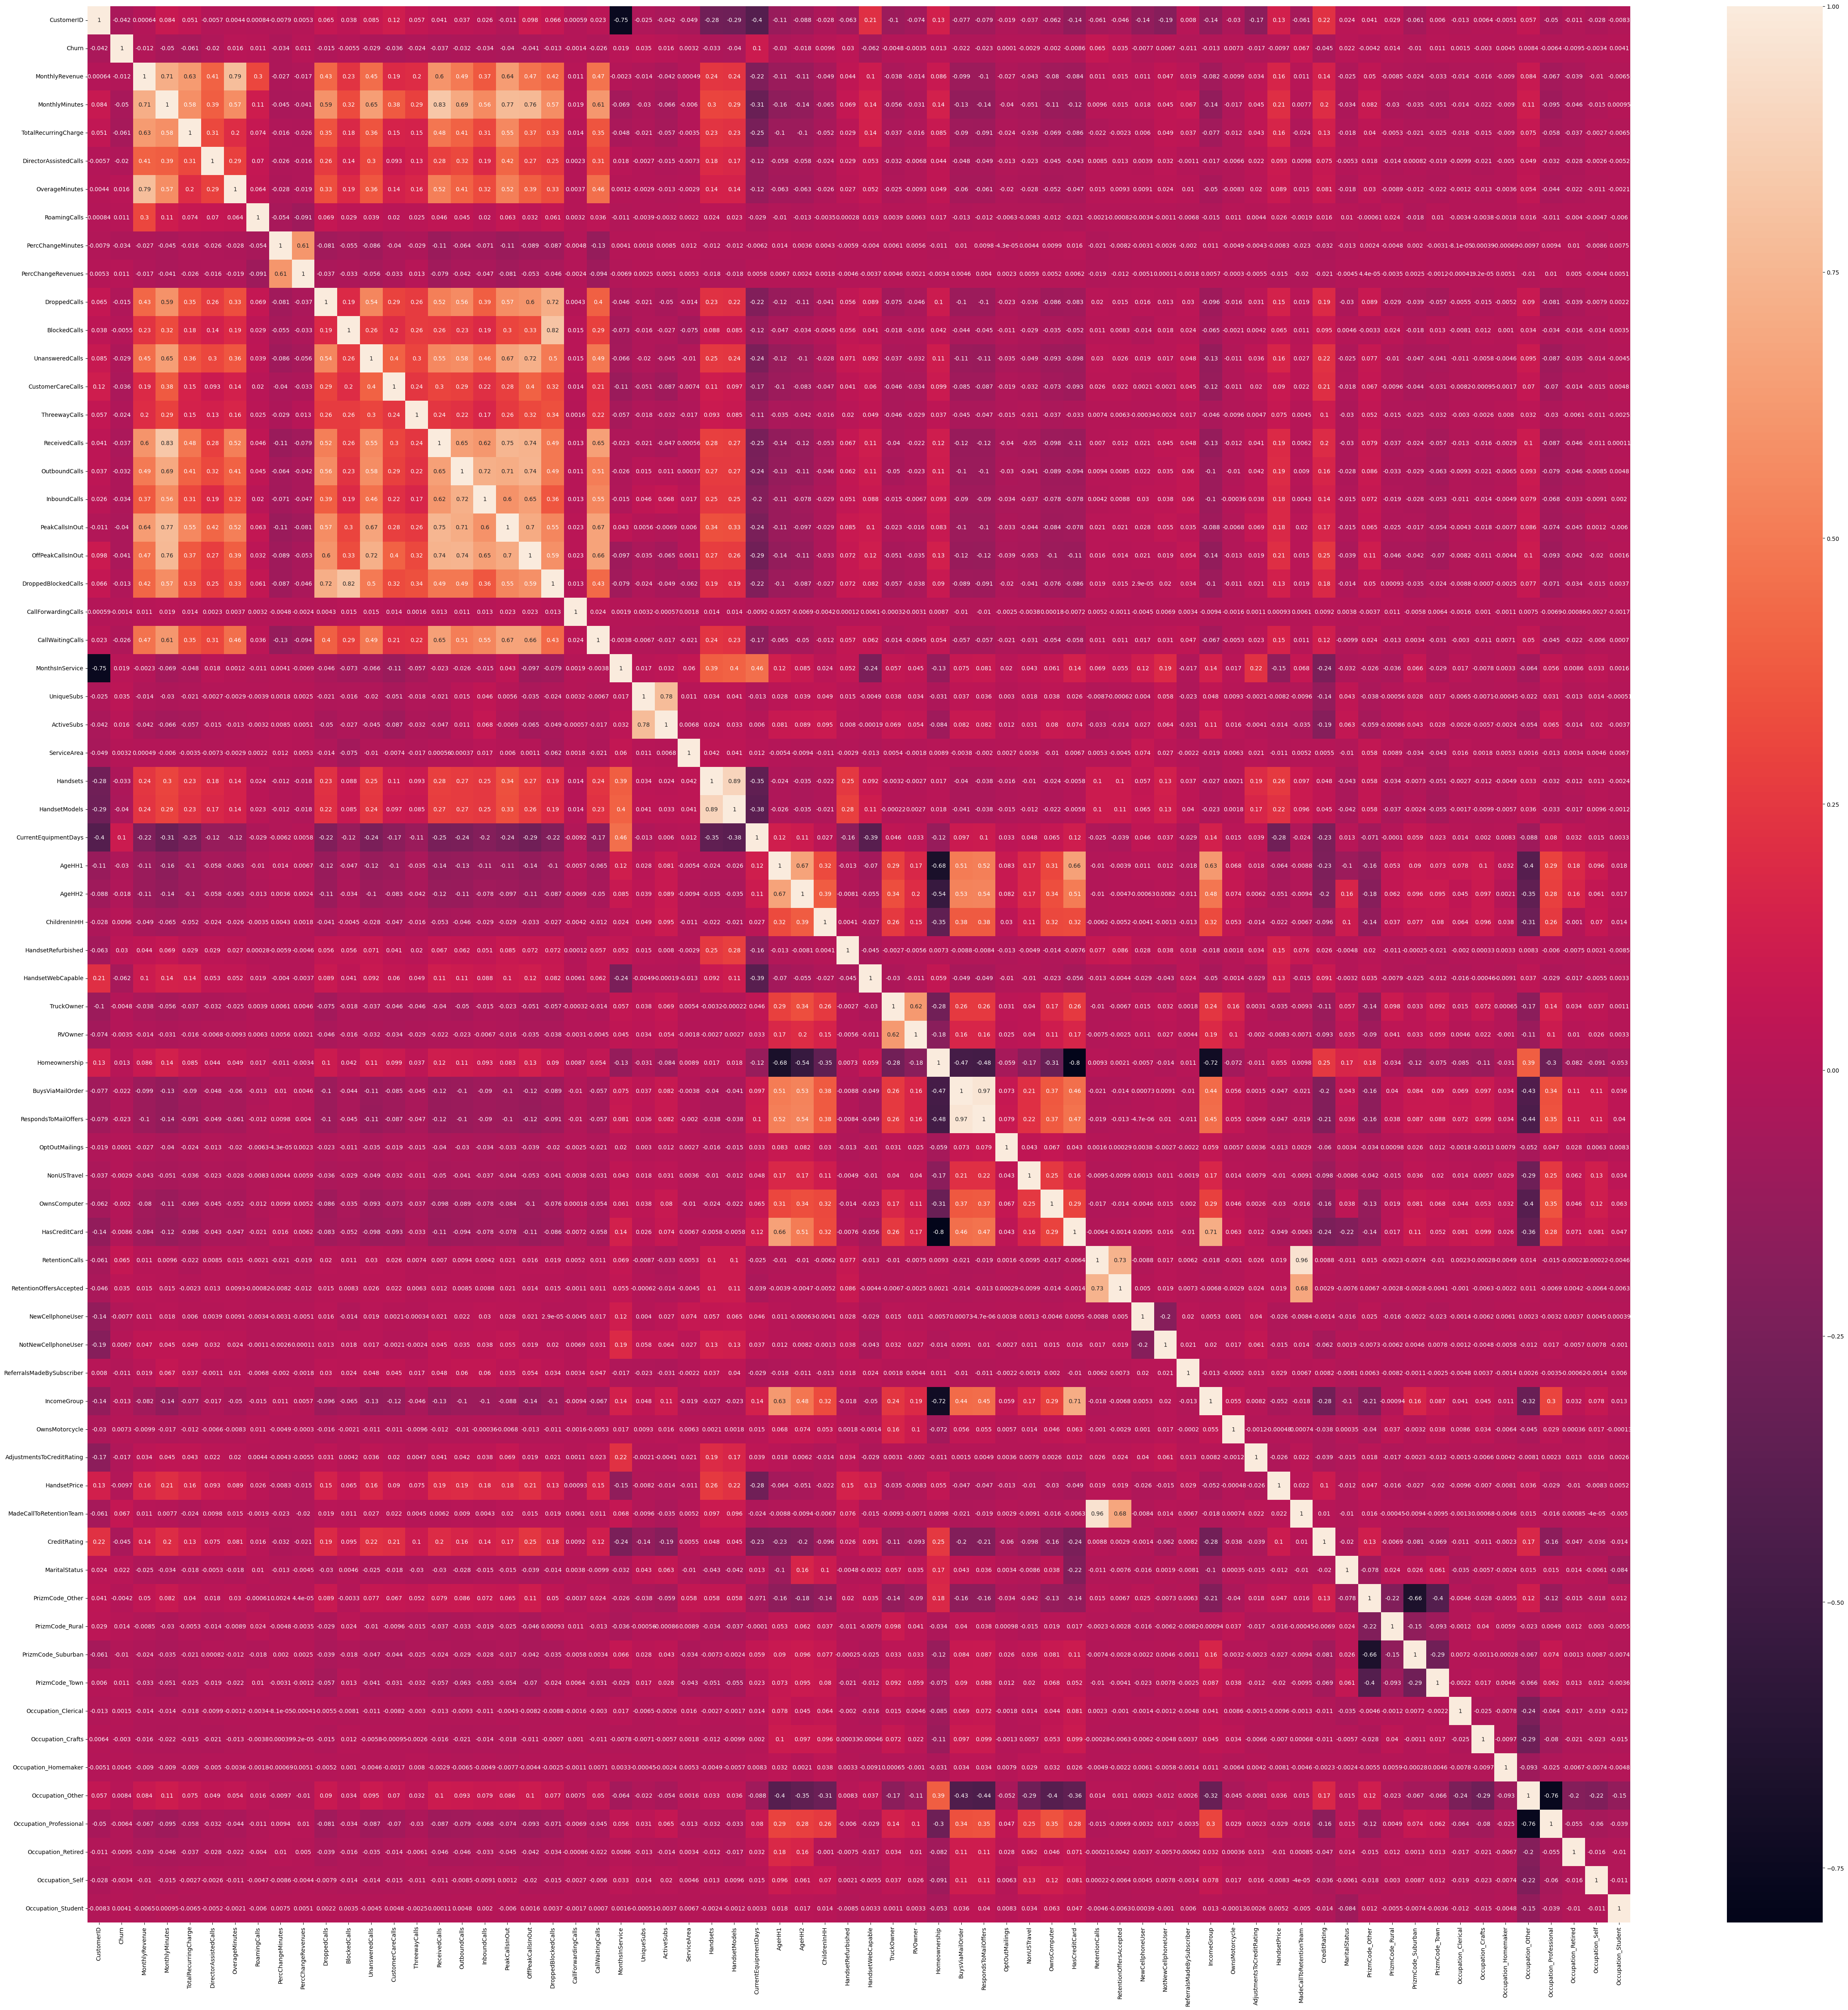

In [61]:
# prompt: heat map

plt.figure(figsize=(60,60))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [15]:
df.drop(['CustomerID'], axis=1, inplace=True)


In [16]:
from sklearn.model_selection import train_test_split

y = df['Churn']
X = df.drop(columns=['Churn'])

In [17]:
from imblearn.over_sampling import SMOTE


# Define target number of samples for the minority class
target_class_os = 1
target_samples = 27000


current_majority_class_size = df[df['Churn'] == 0].shape[0]
current_minority_class_size = df[df['Churn'] == 1].shape[0]


samples_to_generate = target_samples - current_minority_class_size

smote = SMOTE(sampling_strategy={target_class_os: target_samples}, random_state=42)


X_resampled, y_resampled = smote.fit_resample(X, y)

print(f'New class distribution after resampling: {y_resampled.value_counts()}')

New class distribution after resampling: Churn
0    36336
1    27000
Name: count, dtype: int64


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Random Forest Classifier**

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfcla = RandomForestClassifier(n_estimators=100,random_state=9)
rfcla.fit(X_train, y_train)
y_pred = rfcla.predict(X_test)


print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall :', recall_score(y_test, y_pred))
print('F1-score :', f1_score(y_test, y_pred))
print('Confusion_matrix :',confusion_matrix(y_test, y_pred))

Accuracy : 0.7704452162930218
Precision: 0.8682827102803738
Recall : 0.5475138121546961
F1-score : 0.671560876440027
Confusion_matrix : [[6787  451]
 [2457 2973]]


**Artificial Neural Network**

In [20]:
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from keras import models,layers
from keras.models import Sequential


In [21]:
model=Sequential(
[


    Dense(units=64,activation='tanh'),
    Dense(units=64,activation='tanh'),
    Dense(units=64,activation='tanh'),
    Dense(units=1,activation='sigmoid')
])



In [22]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')


In [24]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [29]:
model.fit(X_train, y_train, epochs=120, batch_size=128)

Epoch 1/120
396/396 [==============================] - 1s 2ms/step - loss: 0.1791 - accuracy: 0.7257
Epoch 2/120
396/396 [==============================] - 1s 2ms/step - loss: 0.1780 - accuracy: 0.7280
Epoch 3/120
396/396 [==============================] - 1s 2ms/step - loss: 0.1784 - accuracy: 0.7286
Epoch 4/120
396/396 [==============================] - 1s 2ms/step - loss: 0.1780 - accuracy: 0.7273
Epoch 5/120
396/396 [==============================] - 1s 2ms/step - loss: 0.1780 - accuracy: 0.7280
Epoch 6/120
396/396 [==============================] - 1s 2ms/step - loss: 0.1775 - accuracy: 0.7294
Epoch 7/120
396/396 [==============================] - 1s 3ms/step - loss: 0.1771 - accuracy: 0.7309
Epoch 8/120
396/396 [==============================] - 1s 3ms/step - loss: 0.1772 - accuracy: 0.7311
Epoch 9/120
396/396 [==============================] - 1s 3ms/step - loss: 0.1770 - accuracy: 0.7306
Epoch 10/120
396/396 [==============================] - 1s 3ms/step - loss: 0.1762 - accura

In [30]:
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [31]:
Output=model.predict(X_test)

396/396 [==============================] - 1s 1ms/step


In [32]:
y_pred = y_pred.astype('float32')

print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall :', recall_score(y_test, y_pred))
print('F1-score :', f1_score(y_test, y_pred))
print('Confusion_matrix :',confusion_matrix(y_test, y_pred))

Accuracy : 0.7704452162930218
Precision: 0.8682827102803738
Recall : 0.5475138121546961
F1-score : 0.671560876440027
Confusion_matrix : [[6787  451]
 [2457 2973]]
